In [1]:
# Import packages

import pandas as pd 
import numpy as np 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from scipy import stats

from joblib import dump, load

pd.set_option('display.max_columns', None)

C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
nfl = pd.read_csv('../../data/nfl_game_by_game_raw_stats.csv')

In [3]:
nfl.head()

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,total_rushes,total_rush_yards,rushing_epa,rush_tds,qb_epa,qb_rush_yards,qb_rushing_epa,qb_rush_tds,total_qb_rush_attempts,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,sacks_allowed_team,qb_hits_allowed_team,fumbles_team,lost_fumbles_team,interceptions_thrown_team,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed,total_pass_attempts_allowed,passing_yards_allowed,completions_allowed,passing_epa_allowed,pass_tds_allowed,air_yards_allowed,yards_after_catch_allowed,air_epa_allowed,yac_epa_allowed,avg_cpoe_allowed,qb_epa_allowed,qb_rush_yards_allowed,qb_rushing_epa_allowed,qb_rush_tds_allowed,sacks,qb_hits,fumbles_forced,interceptions,fumbles_recovered,special_teams_epa,total_epa,total_opposing_epa
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,26,110.0,-7.697317,0.0,7.779734,30.0,1.681309,0.0,3.0,2.0,4.0,1.0,1.0,0.0,2.0,4.0,2.0,2.0,0.0,24,52.0,-8.805075,1.0,36,238.0,21.0,0.799435,1.0,148.0,90.0,8.328671,10.101167,-6.609174,-1.749010,10.0,-2.548446,0.0,0.0,4.0,0.0,1.0,0.0,-4.751772,1.654976,-1.654976
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,25,123.0,2.559394,1.0,24.116820,15.0,0.272050,0.0,3.0,1.0,4.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,0.0,28,139.0,4.264254,3.0,42,333.0,29.0,9.202585,1.0,141.0,192.0,1.711281,22.435846,-0.291977,13.906331,2.0,-0.387024,0.0,0.0,0.0,1.0,1.0,1.0,-1.162613,5.183908,-5.183908
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,21,94.0,-0.093163,1.0,-3.078329,7.0,1.793058,0.0,3.0,3.0,6.0,0.0,0.0,1.0,3.0,6.0,1.0,1.0,1.0,24,81.0,-4.888501,0.0,39,303.0,25.0,11.252418,1.0,129.0,172.0,-3.613447,26.073280,-2.044220,7.354762,5.0,-3.897657,0.0,0.0,1.0,0.0,0.0,0.0,-2.107624,-13.436091,13.436091
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,31,197.0,4.315138,1.0,0.591515,23.0,0.222908,1.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0,18,86.0,-0.055888,0.0,49,349.0,34.0,-6.755498,2.0,159.0,190.0,3.427141,16.035978,2.864331,0.058386,0.0,0.000000,0.0,2.0,4.0,1.0,2.0,1.0,3.721131,15.216262,-15.216262
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,33,113.0,-6.247634,0.0,10.352312,10.0,1.929123,0.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,17,102.0,1.025410,0.0,35,183.0,22.0,-10.437735,2.0,138.0,45.0,6.082325,4.351872,0.519191,-3.645375,27.0,2.277812,0.0,3.0,9.0,2.0,2.0,1.0,-3.457676,8.130204,-8.130204


In [4]:
# Pull out only the rushing defense related stats

rush_def = nfl.copy()
rush_def = rush_def[['season', 'week', 'team', 'opponent', 'score', 'opponent_score', 'total_rushes_allowed', 'total_rush_yards_allowed', 
       'rushing_epa_allowed', 'rush_tds_allowed']]
rush_def = rush_def.drop_duplicates()
rush_def

,season,week,team,opponent,score,opponent_score,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed
0,2014,1,ARI,LAC,18,17,24,52.0,-8.805075,1.0
1,2014,1,ATL,NO,37,34,28,139.0,4.264254,3.0
2,2014,1,BAL,CIN,16,23,24,81.0,-4.888501,0.0
3,2014,1,BUF,CHI,23,20,18,86.0,-0.055888,0.0
4,2014,1,CAR,TB,20,14,17,102.0,1.025410,0.0
...,...,...,...,...,...,...,...,...,...,...
5864,2022,21,KC,CIN,23,20,17,71.0,3.206044,1.0
5865,2022,21,PHI,SF,31,7,24,81.0,-13.380709,1.0
5866,2022,21,SF,PHI,7,31,42,150.0,6.019785,4.0
5869,2022,22,KC,PHI,38,35,33,117.0,-1.185963,3.0


In [5]:
# Pull out only the rushing related stats, minus the qb specific ones

In [6]:
# Look at the distribution of rushing epa. Should it be left as is? Scaled?

np.mean(rush_def.rushing_epa_allowed)

-1.0466404692882163

In [7]:
np.max(rush_def.rushing_epa_allowed)

21.332666

In [8]:
np.min(rush_def.rushing_epa_allowed)

-24.650354

In [9]:
best_rush_performance = rush_def.sort_values(by='rushing_epa_allowed', ascending=False)
best_rush_performance.head(20)

,season,week,team,opponent,score,opponent_score,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed
5584,2022,12,GB,PHI,33,40,48,364.0,21.332666,3.0
5674,2022,14,NYG,PHI,22,48,30,254.0,20.417387,4.0
2191,2017,10,BUF,NO,10,47,44,301.0,20.222973,6.0
4246,2020,13,DAL,BAL,17,34,37,294.0,19.281342,2.0
4412,2020,17,CIN,BAL,3,38,54,404.0,17.979248,2.0
3992,2020,6,DAL,ARI,10,38,34,262.0,17.709873,3.0
4384,2020,16,MIN,NO,33,52,42,267.0,17.579145,7.0
2702,2018,6,DEN,LA,20,23,37,272.0,17.223526,2.0
346,2014,10,NYG,SEA,17,38,43,352.0,17.071670,5.0
5860,2022,20,NYG,PHI,7,38,43,269.0,17.021055,3.0


In [10]:
worst_rush_performance = rush_def.sort_values(by='rushing_epa_allowed', ascending=True)
worst_rush_performance.head(20)

,season,week,team,opponent,score,opponent_score,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed
4283,2020,14,DAL,CIN,30,7,30,101.0,-24.650354,0.0
1170,2015,16,LA,SEA,23,17,22,59.0,-22.264070,0.0
3491,2019,10,LA,PIT,12,17,26,43.0,-20.347050,0.0
5174,2021,20,TB,LA,27,30,30,73.0,-20.310823,1.0
364,2014,11,GB,PHI,53,20,31,109.0,-20.012804,0.0
2463,2017,17,JAX,TEN,10,15,38,117.0,-19.525873,0.0
5660,2022,14,DAL,HOU,27,23,37,114.0,-19.098467,1.0
4222,2020,12,NO,DEN,31,3,33,100.0,-19.048563,0.0
5243,2022,2,NO,TB,10,20,28,74.0,-18.976500,0.0
1274,2016,1,MIN,TEN,25,16,22,64.0,-18.734577,0.0


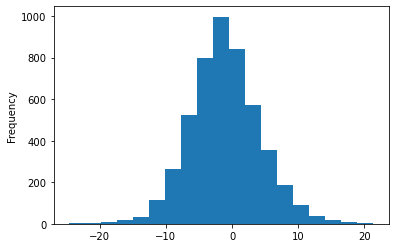

In [11]:
rush_def.rushing_epa_allowed.plot.hist(bins=19)

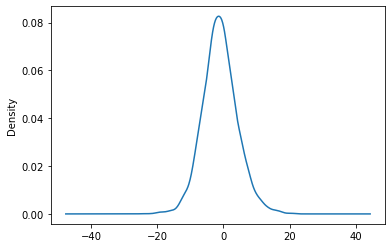

In [12]:
rush_def.rushing_epa_allowed.plot.kde()

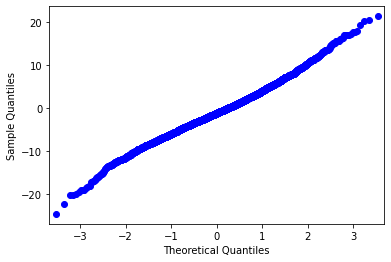

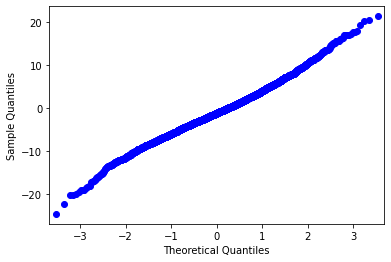

In [13]:
sm.qqplot(rush_def.rushing_epa_allowed)

In [14]:
# Looks normal, and this is basically just an opposite of rushing epa allowed. Going to skip most of the checks
# and basically just got right to making the standardized variables

rushing_epa_allowed_mean = np.mean(rush_def.rushing_epa_allowed)
rushing_epa_allowed_std = np.std(rush_def.rushing_epa_allowed)
rush_def['rushing_epa_allowed_standardized'] = rush_def.apply(lambda x: (x.rushing_epa_allowed - rushing_epa_allowed_mean)/rushing_epa_allowed_std, axis=1)
rush_def.head()

,season,week,team,opponent,score,opponent_score,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed,rushing_epa_allowed_standardized
0,2014,1,ARI,LAC,18,17,24,52.0,-8.805075,1.0,-1.468394
1,2014,1,ATL,NO,37,34,28,139.0,4.264254,3.0,1.005162
2,2014,1,BAL,CIN,16,23,24,81.0,-4.888501,0.0,-0.727127
3,2014,1,BUF,CHI,23,20,18,86.0,-0.055888,0.0,0.187514
4,2014,1,CAR,TB,20,14,17,102.0,1.025410,0.0,0.392165


In [15]:
# Want to also take a look at using rushing epa per play

rush_def['rushing_epa_per_attempt_allowed'] = rush_def.apply(lambda x: x.rushing_epa_allowed/x.total_rushes_allowed, axis=1)

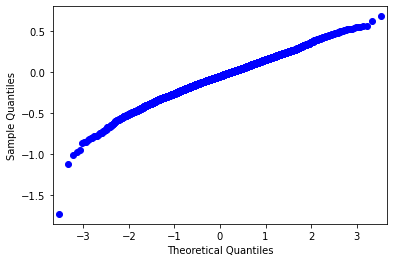

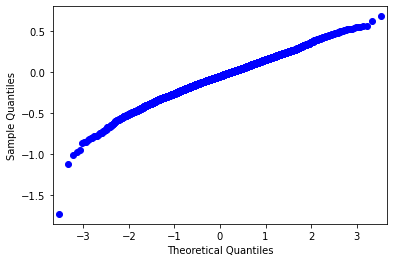

In [16]:
sm.qqplot(rush_def.rushing_epa_per_attempt_allowed)

In [17]:
# 2019 Bears vs Saints performance was so bad, it may need to be removed as an outlier

In [18]:
rush_def_no_bears = rush_def[rush_def.rushing_epa_per_attempt_allowed > -1.5]

In [19]:
np.mean(rush_def_no_bears.rushing_epa_per_attempt_allowed)

-0.05706723372482953

In [20]:
np.std(rush_def_no_bears.rushing_epa_per_attempt_allowed)

0.2133893745519969

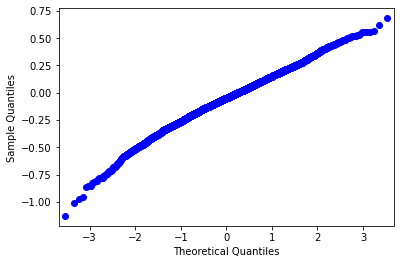

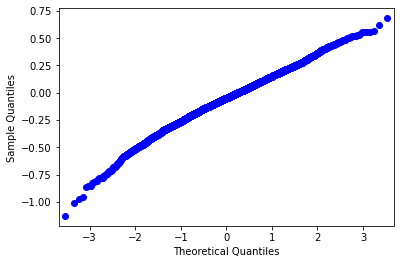

In [21]:
sm.qqplot(rush_def_no_bears.rushing_epa_per_attempt_allowed)

In [22]:
# Looks normal without that data point, creating a variable to normalize rushing_epa_per_attempt

rushing_epa_paa_mean = np.mean(rush_def_no_bears.rushing_epa_per_attempt_allowed)
rushing_epa_paa_std = np.std(rush_def_no_bears.rushing_epa_per_attempt_allowed)
rush_def['rushing_epa_per_attempt_allowed_standardized'] = rush_def.apply(lambda x: (x.rushing_epa_per_attempt_allowed - rushing_epa_paa_mean)/rushing_epa_paa_std, axis=1)
rush_def.head()

,season,week,team,opponent,score,opponent_score,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed,rushing_epa_allowed_standardized,rushing_epa_per_attempt_allowed,rushing_epa_per_attempt_allowed_standardized
0,2014,1,ARI,LAC,18,17,24,52.0,-8.805075,1.0,-1.468394,-0.366878,-1.451857
1,2014,1,ATL,NO,37,34,28,139.0,4.264254,3.0,1.005162,0.152295,0.981127
2,2014,1,BAL,CIN,16,23,24,81.0,-4.888501,0.0,-0.727127,-0.203688,-0.687102
3,2014,1,BUF,CHI,23,20,18,86.0,-0.055888,0.0,0.187514,-0.003105,0.252882
4,2014,1,CAR,TB,20,14,17,102.0,1.025410,0.0,0.392165,0.060318,0.550100


In [23]:
# Still not sure whats best. Per attempt gives higher praise for good games w few rushes and penalized more heavily for
# bad games with fewer rushes. Going to start with total, but may need to change this later.

# A positive epa allowed indicates that the defense performed poorly. To make the value system more intuitive, going to 
# flip the sign for defensive value. This way, high values mean good performances for both offense and defense.
# This shouldnt make a difference for the algorithms, but it will make the data more easily interpretable

rush_def_to_save = rush_def.copy()
rush_def_to_save['rush_def_value'] = -rush_def_to_save.rushing_epa_allowed_standardized
rush_def_to_save.head()

,season,week,team,opponent,score,opponent_score,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed,rushing_epa_allowed_standardized,rushing_epa_per_attempt_allowed,rushing_epa_per_attempt_allowed_standardized,rush_def_value
0,2014,1,ARI,LAC,18,17,24,52.0,-8.805075,1.0,-1.468394,-0.366878,-1.451857,1.468394
1,2014,1,ATL,NO,37,34,28,139.0,4.264254,3.0,1.005162,0.152295,0.981127,-1.005162
2,2014,1,BAL,CIN,16,23,24,81.0,-4.888501,0.0,-0.727127,-0.203688,-0.687102,0.727127
3,2014,1,BUF,CHI,23,20,18,86.0,-0.055888,0.0,0.187514,-0.003105,0.252882,-0.187514
4,2014,1,CAR,TB,20,14,17,102.0,1.025410,0.0,0.392165,0.060318,0.550100,-0.392165


In [24]:
rush_def_to_save.to_csv('rush_defense_value_model_v2_data/rush_def_with_value.csv')